<a href="https://colab.research.google.com/github/svenugo1/64061/blob/main/Copy_of_Assignment_2_Main_copy_for_submittion_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"samiksha23","key":"d03ad5f3f187f0a119725ca9ba3cfc15"}'}

Loading the data file .
This assignment Cats and Dogs are fundamental techniques in deep learning used for classification of images. Using  keras we will build and train a convolution neuro network for classifying of Cats and Dogs. Use of serval techniques like Data auggemnetation. Data auggementation are a technique to reduce overfitting 

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -qq dogs-vs-cats.zip

replace sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip -qq test1.zip

replace test1/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!unzip -qq train.zip

1)Consider the Cats & Dogs example. Start initially with a training sample of 1000, a validation 
sample of 500, and a test sample of 500 (like in the text). Use any technique to reduce 
overfitting and improve performance in developing a network that you train from scratch. What 
performance did you achieve?  


Showing images to training , validation and test directories 

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)

Data Preprocessing 

Converting the data into preprocess tensor before , Building a model.
1)Read the pictures
2)The Data is in JPEG content into RGB grid of pixels.
3)convert these into floating  point tensors
4)Resize or Rescaling
5) Making them into batches


Using image_dataset_from_directory to read images

Note - using this due to running in batches 

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
import numpy as np
import tensorflow as tf
random_numbers = np.random.normal(size=(1000, 16))
dataset = tf.data.Dataset.from_tensor_slices(random_numbers)

In [ ]:
for i, element in enumerate(dataset):
    print(element.shape)
    if i >= 2:
        break

(16,)
(16,)
(16,)



Batching the data into batches of size 32


In [ ]:
batched_dataset = dataset.batch(32)
for i, element in enumerate(batched_dataset):
    print(element.shape)
    if i >= 2:
        break

(32, 16)
(32, 16)
(32, 16)


In [ ]:
reshaped_dataset = dataset.map(lambda x: tf.reshape(x, (4, 4)))
for i, element in enumerate(reshaped_dataset):
    print(element.shape)
    if i >= 2:
        break

(4, 4)
(4, 4)
(4, 4)



Showing the shape of the data and labels 


In [ ]:
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


Building a model


Instantiating a small convet for doga vs cats classification

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

inputs = keras.Input(shape=(180, 180, 3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

Configuring the model for training 


In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                         

Input shape is ( 180,180,3)

Number of channels used is 32.

Classification network 2 layers -
hidden layer - 12544
Final layer - 1 
Training parameter are - 991,041

Fiiting the model using a Dataset

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
63/63 [==============================] - 152s 2s/step - loss: 0.6954 - accuracy: 0.5185 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
63/63 [==============================] - 155s 2s/step - loss: 0.6938 - accuracy: 0.5020 - val_loss: 0.6930 - val_accuracy: 0.5200
Epoch 3/30
63/63 [==============================] - 150s 2s/step - loss: 0.6936 - accuracy: 0.4900 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/30
63/63 [==============================] - 149s 2s/step - loss: 0.6939 - accuracy: 0.4960 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 5/30
63/63 [==============================] - 149s 2s/step - loss: 0.6922 - accuracy: 0.5165 - val_loss: 0.6786 - val_accuracy: 0.4990
Epoch 6/30
63/63 [==============================] - 150s 2s/step - loss: 0.6850 - accuracy: 0.5290 - val_loss: 0.6880 - val_accuracy: 0.5330
Epoch 7/30
63/63 [==============================] - 149s 2s/step - loss: 0.6873 - accuracy: 0.5335 - val_loss: 0.6807 - val_accuracy: 0.5500
Epoch 8/30
63

Displaying a curve of loss and accuracy durning training

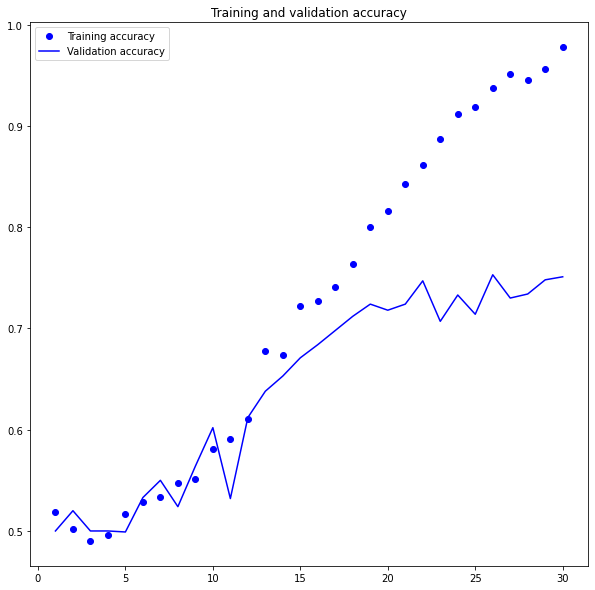

<Figure size 432x288 with 0 Axes>

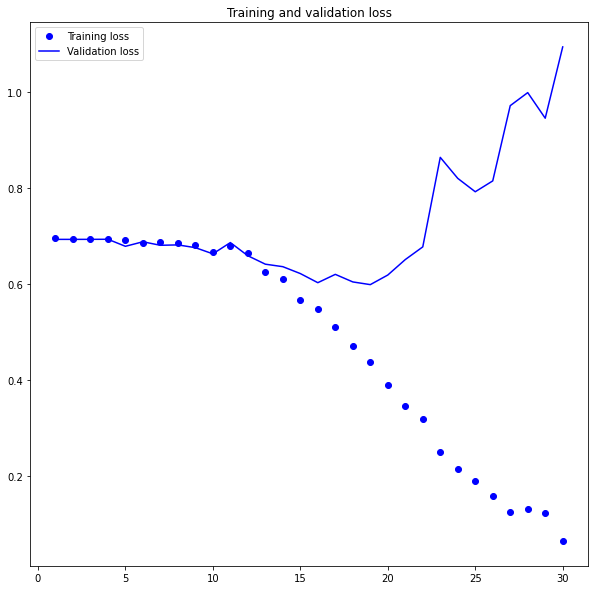

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.figure(figsize=(10, 10))
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:

Evaluating the model on the test set

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 18s 549ms/step - loss: 0.6410 - accuracy: 0.7170
Test accuracy: 0.717


2) Increase your training sample size. You may pick any amount. Keep the validation and test 
samples the same as above. Optimize your network (again training from scratch). What  performance did you achieve? 


Defining a data augmentation stage to add to image model



In [ ]:
import os, shutil, pathlib

shutil.rmtree("./cats_vs_dogs_small_Q2", ignore_errors=True)

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q2")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=2000)
make_subset("test", start_index=2000, end_index=2500)

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

Showing some randomly augmented training image 

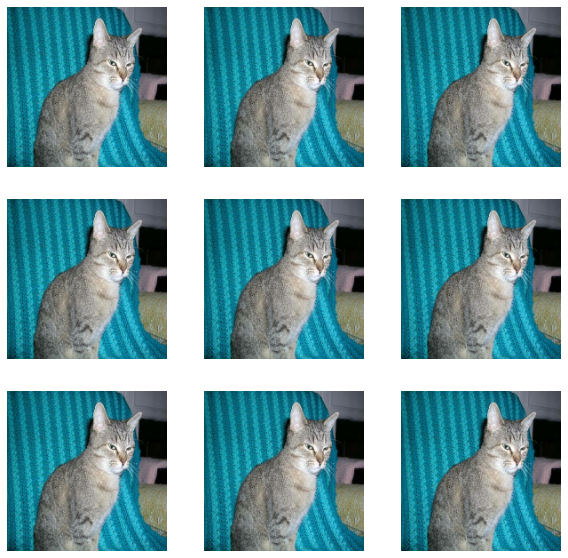

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

Defining a new convet that includes images augmentation and dropout

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])


 Training the regularized convnet

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 179s 3s/step - loss: 0.6951 - accuracy: 0.5070 - val_loss: 0.6862 - val_accuracy: 0.5130
Epoch 2/50
63/63 [==============================] - 178s 3s/step - loss: 0.6924 - accuracy: 0.5450 - val_loss: 0.6722 - val_accuracy: 0.5770
Epoch 3/50
63/63 [==============================] - 177s 3s/step - loss: 0.6663 - accuracy: 0.5970 - val_loss: 0.6898 - val_accuracy: 0.5490
Epoch 4/50
63/63 [==============================] - 177s 3s/step - loss: 0.6610 - accuracy: 0.6100 - val_loss: 0.6575 - val_accuracy: 0.6150
Epoch 5/50
63/63 [==============================] - 177s 3s/step - loss: 0.6461 - accuracy: 0.6320 - val_loss: 0.6381 - val_accuracy: 0.6320
Epoch 6/50
63/63 [==============================] - 178s 3s/step - loss: 0.6233 - accuracy: 0.6715 - val_loss: 0.6149 - val_accuracy: 0.6700
Epoch 7/50
63/63 [==============================] - 177s 3s/step - loss: 0.6142 - accuracy: 0.6775 - val_loss: 0.6718 - val_accuracy: 0.5760
Epoch 8/50
63


Evaluating the model on the test set


In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 24s 722ms/step - loss: 0.4191 - accuracy: 0.8270
Test accuracy: 0.827


3)Now change your training sample so that you achieve better performance than those from Steps 
1 and 2. This sample size may be larger, or smaller than those in the previous steps. The 
objective is to find the ideal training sample size to get best prediction results.  

Increasing the training sample to 2000, keeping the validation and test sets the same as before ( 500 samples)

In [ ]:
original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("cats_vs_dogs_small_Q3")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)
#Creating training, Test and validation sets.
#Training has 1000 samples, test has 500 samples and validation has 500 samples.
make_subset("train", start_index=0, end_index=2000)
make_subset("validation", start_index=2000, end_index=2500)
make_subset("test", start_index=2500, end_index=3000)


Defining a new convet with increased training samples, image augementation and drop out

In [ ]:
inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 10s 128ms/step - loss: 0.6961 - accuracy: 0.5045 - val_loss: 0.6917 - val_accuracy: 0.6190
Epoch 2/50
63/63 [==============================] - 8s 115ms/step - loss: 0.6919 - accuracy: 0.5075 - val_loss: 0.6858 - val_accuracy: 0.6170
Epoch 3/50
63/63 [==============================] - 8s 117ms/step - loss: 0.6925 - accuracy: 0.5230 - val_loss: 0.6874 - val_accuracy: 0.5160
Epoch 4/50
63/63 [==============================] - 8s 114ms/step - loss: 0.6882 - accuracy: 0.5285 - val_loss: 0.6808 - val_accuracy: 0.5400
Epoch 5/50
63/63 [==============================] - 8s 115ms/step - loss: 0.6889 - accuracy: 0.5120 - val_loss: 0.6775 - val_accuracy: 0.5540
Epoch 6/50
63/63 [==============================] - 8s 114ms/step - loss: 0.6974 - accuracy: 0.4960 - val_loss: 0.6911 - val_accuracy: 0.5000
Epoch 7/50
63/63 [==============================] - 7s 114ms/step - loss: 0.6925 - accuracy: 0.4875 - val_loss: 0.6848 - val_accuracy: 0.4940
Epoch

Evaluting the model

In [ ]:
test_model = keras.models.load_model(
    "convnet_from_scratch_with_augmentation1.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 47ms/step - loss: 0.4710 - accuracy: 0.7970
Test accuracy: 0.797


4)Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use in Steps 2 and 3 
for the pretrained network may be the same or different from those using the network where 
you trained from scratch. Again, use any and all optimization techniques to get best 
performance. 

Feature extraction with a pretrained model
using the representation laerned by previously trained model(Image) to extracr interesting features from new samples. Then its run through a new classifier 


Using the VGG 16 convolution base

In [ ]:
conv_base = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 45, 45, 128)       0     



Feature extraction without data augmentation using a pretrained model 


Extracting the VGG 6 features and corresponding labels

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_dataset)
val_features, val_labels =  get_features_and_labels(validation_dataset)
test_features, test_labels =  get_features_and_labels(test_dataset)

In [ ]:
train_features.shape

Defining and training the densely connected classifier

In [ ]:
inputs = keras.Input(shape=(5, 5, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
      filepath="feature_extraction.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
63/63 [==============================] - 4s 50ms/step - loss: 12.1504 - accuracy: 0.9295 - val_loss: 4.2080 - val_accuracy: 0.9700
Epoch 2/20
63/63 [==============================] - 3s 47ms/step - loss: 4.5367 - accuracy: 0.9695 - val_loss: 4.6318 - val_accuracy: 0.9760
Epoch 3/20
63/63 [==============================] - 3s 49ms/step - loss: 1.8574 - accuracy: 0.9890 - val_loss: 5.4805 - val_accuracy: 0.9760
Epoch 4/20
63/63 [==============================] - 3s 42ms/step - loss: 1.4924 - accuracy: 0.9900 - val_loss: 5.6507 - val_accuracy: 0.9720
Epoch 5/20
63/63 [==============================] - 3s 43ms/step - loss: 0.4947 - accuracy: 0.9965 - val_loss: 6.3361 - val_accuracy: 0.9700
Epoch 6/20
63/63 [==============================] - 3s 44ms/step - loss: 0.8763 - accuracy: 0.9925 - val_loss: 4.6437 - val_accuracy: 0.9770
Epoch 7/20
63/63 [==============================] - 3s 43ms/step - loss: 0.5285 - accuracy: 0.9940 - val_loss: 5.9970 - val_accuracy: 0.9780
Epoch 8/20
6

Plotting the results

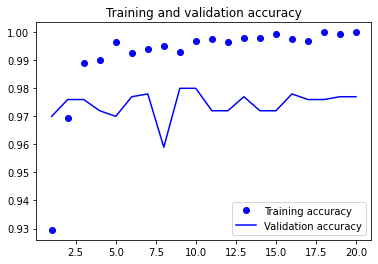

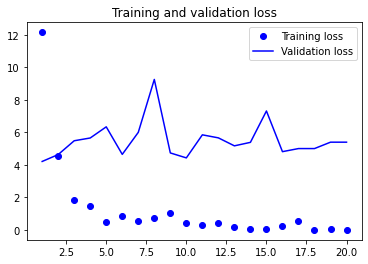

In [ ]:
import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()


Feature extraction with data augmentation using a pretrained model 

Instantiatin and freezing the VGG16 convolutional base

Printing the list of trainable weights before and after frezing

In [ ]:
conv_base  = keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))

This is the number of trainable weights before freezing the conv base: 26


Additing data argumantation and classifier to the convolutional base.

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
    ]
)

inputs = keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model = keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/50
63/63 [==============================] - 68s 778ms/step - loss: 5972.2012 - accuracy: 0.5010 - val_loss: 0.6833 - val_accuracy: 0.5190
Epoch 2/50
63/63 [==============================] - 45s 708ms/step - loss: 1.0679 - accuracy: 0.5295 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 3/50
63/63 [==============================] - 45s 708ms/step - loss: 3.5003 - accuracy: 0.5380 - val_loss: 0.6939 - val_accuracy: 0.5000
Epoch 4/50
63/63 [==============================] - 45s 702ms/step - loss: 0.6936 - accuracy: 0.4965 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/50
63/63 [==============================] - 45s 704ms/step - loss: 0.6936 - accuracy: 0.4875 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 6/50
63/63 [==============================] - 45s 703ms/step - loss: 0.6937 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 7/50
63/63 [==============================] - 45s 702ms/step - loss: 0.6938 - accuracy: 0.4955 - val_loss: 0.6932 - val_accuracy: 0.5


Evaluting the model on the test set 

In [ ]:
model = keras.models.load_model("fine_tuning.keras")
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

OSError: ignored

Summary - To summarise this report , we are using and keras package library. 
Where our goal is to draw to detect the image is it a cat or dog. Further we build the model and plot the accuracy and loss of validation and test set . This is to infer that the model has build with repect to Training a convent from scratch.
To infer - the model performance as training sample size increases accuary increases and loss is decreased  .

 Firstly , training a small convnet on the 1,000 training samples, without any optimization to set a baseline which got us a classification accuracy - 71% Here we can see overfitting of data . Further used Data agumentation and other optimization techniqies which determines the optimal number of epochs. By using data augmentation we can improved the model accuracy by .
To add on then implemented optimal training sample to increase classification accuracy 82%.
The model is achieved 82% accuracy.
Here we used  2D conv layer and a 2 Dmax pooling layer and then flattern layer
 where Input shape is ( 180,180,3)
Number of channels used is 32.
Classification network 2 layers - hidden layer - 12544 Final layer - 1 Training parameter are - 991,041.


Further we try to find the optimal sample to increase classification accuracy. Observation made by the manipulation of training sample and usage of other optimization techniques that the best way prevent overfitting are-
Firstly getting more training samples by increasing. the training sample is not always possible. One waay of optimally using the less training sample is Data Augmentation.
Secondly reducing the capacity of network by reducing the size of the model .
The numnber of learnable parameters in the model which is required are tge number of layers and the number of units in layers and prevets overfitting.
Further adding weight regularization adding constraints on the complexity of the network by forcing the weights to take only small values.which inturn minimizing overfitting.
Lastly adding dropout -the dropout rate are in fraction of feactures that rae zeroed out.
Now using pretrained network. The sample size id different from the inital network
A pretrained VGG16 model with Fine-tuning is used 
To Note the  performance of validation accuracy  - 
which is better achieved while training a small model.The plot indicates that overfitting mostly start to dropout in large rate. As mentioned data augmentationprevents overfitting with small images datasets.
To sum up -
Pretrained model with Augmentation there was just a minor increase in the accuarcy 97% to 98%.
Uisng Pretained model with fine tuning my test accuracy of 97%. Accuracy results might change.  


